# fastlite

`fastlite` provides some little quality-of-life improvements for interactive use of the wonderful [sqlite-utils](https://sqlite-utils.datasette.io/) library. It's likely to be particularly of interest to folks using Jupyter.

## Install

```
pip install fastlite
```

## Overview

In [1]:
from sqlite_utils import Database
from fastlite import *
from fastcore.utils import *

We demonstrate `fastlite`'s features here using the 'chinook' sample database.

In [2]:
url = 'https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite'
path = Path('chinook.sqlite')
if not path.exists(): urlsave(url, path)

db = Database("chinook.sqlite")

Databases have a `t` property that lists all tables:

In [3]:
dt = db.t
dt

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track

You can use this to grab a single table...:

In [4]:
artist = dt.Artist
artist

<Table Artist (ArtistId, Name)>

...or multiple tables at once:

In [13]:
dt['Artist','Album','Track','Genre','MediaType']

[<Table Artist (ArtistId, Name)>,
 <Table Album (AlbumId, Title, ArtistId)>,
 <Table Track (TrackId, Name, AlbumId, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice)>,
 <Table Genre (GenreId, Name)>,
 <Table MediaType (MediaTypeId, Name)>]

It also provides auto-complete in Jupyter, IPython, and nearly any other interactive Python environment:

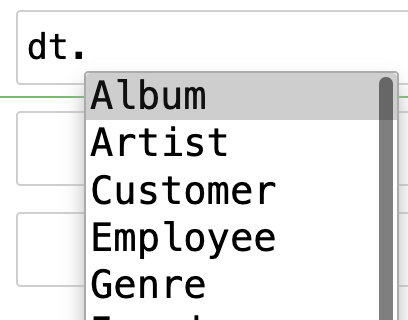{width=180}

Column work in a similar way to tables, using the `c` property:

In [6]:
ac = artist.c
ac

ArtistId, Name

Auto-complete works for columns too:

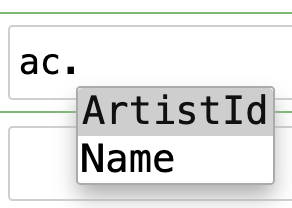{width=140}

Columns, tables, and view stringify in a format suitable for including in SQL statements. That means you can use auto-complete in f-strings.

In [14]:
qry = f"select * from {artist} where {ac.Name} like 'AC/%'"
print(qry)

select * from "Artist" where "Artist"."Name" like 'AC/%'


You can view the results of a select query using `q`:

In [15]:
db.q(qry)

[{'ArtistId': 1, 'Name': 'AC/DC'}]

Views can be accessed through the `v` property:

In [9]:
album = dt.Album

acca_sql = f"""select {album}.*
from {album} join {artist} using (ArtistId)
where {ac.Name} like 'AC/%'"""

db.create_view("AccaDaccaAlbums", acca_sql, replace=True)
db.q(f"select * from {db.v.AccaDaccaAlbums}")

[{'AlbumId': 1,
  'Title': 'For Those About To Rock We Salute You',
  'ArtistId': 1},
 {'AlbumId': 4, 'Title': 'Let There Be Rock', 'ArtistId': 1}]

If you have graphviz installed, you can create database diagrams:

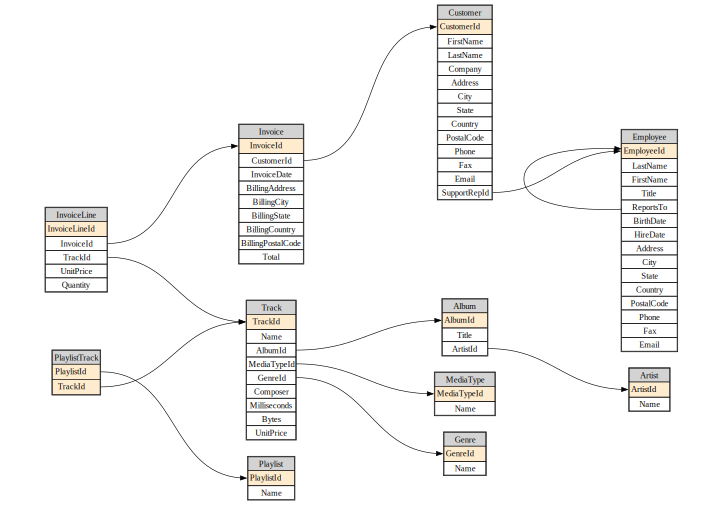

In [10]:
diagram(db.tables)

Pass a subset of columns to just diagram those. You can also adjust the size and aspect ratio.

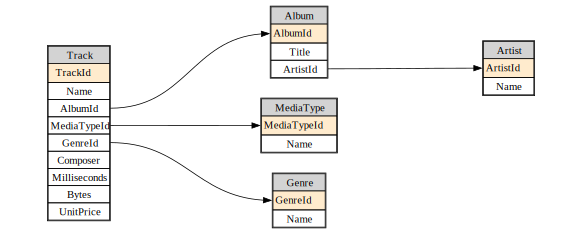

In [17]:
diagram(db.t['Artist','Album','Track','Genre','MediaType'], size=8, ratio=0.4)

## fin -